#Задание на взаимную проверку по разделу 2.2. AdaBoost. Градиентный бустинг.


Задания по обучению и оценке моделей AdaBoost и GBM (градиентный бустинг) для задачи классификации на примере прогнозирования уровня дохода потенциальных клиентов банка 



В качестве данных возьмем датасет о доходах граждан в различных странах - Adult Income (https://archive.ics.uci.edu/ml/datasets/Adult). Скачайте две таблицы для обучения и теста. Далее в блокноте приведено решение для этапа предобработки данных, изучите и обработайте входные данные для тестовой выборки по аналогии с обучающей.

Далее выполните этапы машинного обучени последовательно:

Разбить таблицу данных на матрицы X и y.
Обучить алгоритм AdaBoost и подобрать лучшие гиперпараметры (2 балла).
Обучить алгоритм градиентный бустинг (GBM) и подобрать лучшие гиперпараметры (2 балла).
Посчитать значения метрик accuracy, precision, recall (1 балл)

Справочная информация по построению модели
AdaBoost для классификации
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html?highlight=adaboost#sklearn.ensemble.AdaBoostClassifier
Справочная информация по построению модели GBM (градиентный бустинг) для задач классификации
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier



## 1. Подготовка данных для анализа

Импортируем pandas.

In [1]:
import pandas as pd

В файлах с данными нет названий столбцов, так что укажем их вручную.

In [2]:
columns_list = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship',
                'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'salary']

Загрузим обучающую выборку.

In [3]:
train = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', names=columns_list, header=None)

Загрузим тестовую выборку.

Первая строка файла выглядит так: "|1x3 Cross validator".

Эта строка не только не содержит полезной информации, но и мешает правильному преобразованию файла в DataFrame. Удалим ее.

In [4]:
test = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test', names=columns_list, header=None, skiprows=1)

Выведем первые 10 строк обучающей выборки.

In [5]:
train.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


Выведем размерность обучающей выборки.

In [6]:
train.shape

(32561, 15)

Выведите количество пропущенных значений и тип для каждой переменной обучающей выборки.

Видно, что пропущенных значений нет.

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Выведем первые 10 строк тестовой выборки.

In [8]:
test.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K.
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K.
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K.
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K.


Выведем размерность тестовой выборки.

In [9]:
test.shape

(16281, 15)

Выведите количество пропущенных значений и тип для каждой переменной тестовой выборки.

Видно, что пропущенных значений нет.

In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             16281 non-null  int64 
 1   workclass       16281 non-null  object
 2   fnlwgt          16281 non-null  int64 
 3   education       16281 non-null  object
 4   education-num   16281 non-null  int64 
 5   marital-status  16281 non-null  object
 6   occupation      16281 non-null  object
 7   relationship    16281 non-null  object
 8   race            16281 non-null  object
 9   sex             16281 non-null  object
 10  capital-gain    16281 non-null  int64 
 11  capital-loss    16281 non-null  int64 
 12  hours-per-week  16281 non-null  int64 
 13  native-country  16281 non-null  object
 14  salary          16281 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


Формат целевой переменной отличается в обучающей и тестовой выборках.

Чтобы дальнейшая предобработка происходила правильно, преобразуем целевую переменную тестовой выборки к формату обучающей выборки.

In [11]:
train['salary'].value_counts()

 <=50K    24720
 >50K      7841
Name: salary, dtype: int64

In [12]:
test['salary'].value_counts()

 <=50K.    12435
 >50K.      3846
Name: salary, dtype: int64

In [13]:
test['salary'] = test['salary'].apply(lambda x: x[:-1])
test['salary'].value_counts()

 <=50K    12435
 >50K      3846
Name: salary, dtype: int64

Проведем предобработку обучающей и тестовой выборок.

In [14]:
# Удалим лишние признаки
train.drop(['native-country'], axis=1, inplace=True)
test.drop(['native-country'], axis=1, inplace=True)

# Преобразуем целевую переменную в бинарные значения, ниже 50 тысяч - 0, выше -1
train['salary'] = (train['salary'] != ' <=50K').astype('int32')
test['salary'] = (test['salary'] != ' <=50K').astype('int32')

# Преобразуем категориальные данные в числовые
train = pd.get_dummies(train, columns=['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex'])
test = pd.get_dummies(test, columns=['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex'])

Выведем на экран промежуточные результаты предобработки обучающей выборки.

In [15]:
train.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,salary,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,...,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0


Выведем на экран промежуточные результаты предобработки тестовой выборки.

In [16]:
test.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,salary,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,...,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
0,25,226802,7,0,0,40,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
1,38,89814,9,0,0,50,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,28,336951,12,0,0,40,1,0,0,1,...,0,0,0,0,0,0,0,1,0,1
3,44,160323,10,7688,0,40,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,18,103497,10,0,0,30,0,1,0,0,...,1,0,0,0,0,0,0,1,1,0


Проведем нормализацию нуждающихся в этом признаков обучающей и тестовой выборок.

In [17]:
# Нормализовать нуждающиеся в этом признаки
a_features = train[['age', 'education-num', 'hours-per-week', 'fnlwgt', 'capital-gain', 'capital-loss']].values
norm_features = (a_features - a_features.mean(axis=0)) / a_features.std(axis=0)
train.loc[:, ['age', 'education-num', 'hours-per-week', 'fnlwgt', 'capital-gain', 'capital-loss']] = norm_features

a_features = test[['age', 'education-num', 'hours-per-week', 'fnlwgt', 'capital-gain', 'capital-loss']].values
norm_features = (a_features - a_features.mean(axis=0)) / a_features.std(axis=0)
test.loc[:, ['age', 'education-num', 'hours-per-week', 'fnlwgt', 'capital-gain', 'capital-loss']] = norm_features

Выведем на экран подмножество обучающей выборки после нормализации.

In [18]:
train.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,salary,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,...,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0


Выведем на экран размерность обучающей выборки. Количество столбцов увеличилось после one-hot кодирования.

In [19]:
train.shape

(32561, 67)

Выведем на экран подмножество тестовой выборки после нормализации.

In [20]:
test.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,salary,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,...,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
0,-0.994129,0.353474,-1.196864,-0.142662,-0.218062,-0.031432,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
1,-0.055417,-0.942391,-0.417886,-0.142662,-0.218062,0.769918,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,-0.777503,1.395450,0.750582,-0.142662,-0.218062,-0.031432,1,0,0,1,...,0,0,0,0,0,0,0,1,0,1
3,0.377835,-0.275397,-0.028397,0.871091,-0.218062,-0.031432,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,-1.499590,-0.812954,-0.028397,-0.142662,-0.218062,-0.832781,0,1,0,0,...,1,0,0,0,0,0,0,1,1,0


Выведем на экран размерность тестовой выборки. Количество столбцов увеличилось после one-hot кодирования.

In [21]:
test.shape

(16281, 67)

Отделим целевую переменную от данных.

In [22]:
x_train = train.drop('salary', axis=1)
x_test = test.drop('salary', axis=1)
y_train = train['salary']
y_test = test['salary']

Видно, что классы несбалансированны.

In [23]:
y_train.value_counts()

0    24720
1     7841
Name: salary, dtype: int64

In [24]:
y_test.value_counts()

0    12435
1     3846
Name: salary, dtype: int64

## 2. AdaBoost

Обучим модель AdaBoost.

In [47]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier().fit(x_train, y_train)
prediction_train = ada.predict(x_train)
prediction_test = ada.predict(x_test)

Создадим функцию, которая принимает на вход классификатор и данные и возвращает вероятности принадлежности элементов выборки к классу 1. Эти вероятности нужны, в частности, для вычисления метрики AUC ROC.

In [49]:
def class_1_probabilities(classifier, data):
    class_probabilities = classifier.predict_proba(data)
    class1_index = list(classifier.classes_).index(1)
    return class_probabilities[:, class1_index]

Вычислим значения метрик для обученной модели.

Значения метрик получились достаточно неплохими, далее попробуем их улучшить с помощью подбора гиперпараметров.

In [51]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print('Accuracy on train: ', accuracy_score(y_train, prediction_train))
print('Accuracy on test: ', accuracy_score(y_test, prediction_test))
print()
print('Precision on train: ', precision_score(y_train, prediction_train))
print('Precision on test: ', precision_score(y_test, prediction_test))
print()
print('Recall on train: ', recall_score(y_train, prediction_train))
print('Recall on test: ', recall_score(y_test, prediction_test))
print()
print('F1 on train: ', f1_score(y_train, prediction_train))
print('F1 on test: ', f1_score(y_test, prediction_test))
print()
print('AUC ROC on train: ', roc_auc_score(y_train, class_1_probabilities(ada, x_train)))
print('AUC ROC on test: ', roc_auc_score(y_test, class_1_probabilities(ada, x_test)))

Accuracy on train:  0.8612450477565186
Accuracy on test:  0.8568883975185799

Precision on train:  0.7616947550795401
Precision on test:  0.7440437862202189

Recall on train:  0.6167580665731411
Recall on test:  0.6008840353614144

F1 on train:  0.6816067653276956
F1 on test:  0.6648446490218642

AUC ROC on train:  0.9166483129091998
AUC ROC on test:  0.9108110693547163


Для подбора гиперпараметров будем использовать GridSearchCV.

При первом запуске зададим большие интервалы поиска для гиперпараметров, чтобы определить примерные значения гиперпараметром.

In [27]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from datetime import datetime

In [32]:
start_time = datetime.now()

param_grid = {'n_estimators': np.linspace(50, 1000, 8, dtype=int), 'learning_rate': np.linspace(0.5, 2.5, 6)}

cv = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=param_grid, cv=3, scoring='roc_auc', n_jobs=-1)
cv.fit(x_train, y_train)

print('Execution time:')
print(datetime.now() - start_time)

Execution time:
0:16:00.062633


In [33]:
cv.best_estimator_

AdaBoostClassifier(learning_rate=0.9, n_estimators=864)

In [34]:
cv.best_score_

0.9264288459285773

Сузим интервалы к окрестностям значений из предыдущего этапа, и снова запустим GridSearchCV, чтобы подобрать более точные оптимальные значения.

In [52]:
start_time = datetime.now()

param_grid = {'n_estimators': np.linspace(800, 900, 5, dtype=int), 'learning_rate': np.linspace(0.5, 1.5, 6)}

cv = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=param_grid, cv=3, scoring='roc_auc', n_jobs=-1)
cv.fit(x_train, y_train)

print('Execution time:')
print(datetime.now() - start_time)

Execution time:
0:20:22.209699


In [39]:
best_ada = cv.best_estimator_
best_ada

AdaBoostClassifier(learning_rate=0.9, n_estimators=871)

In [37]:
cv.best_score_

0.9264457492094912

Вычислим прогнозы модели с оптимальными гиперпараметрами.

In [55]:
prediction_train = best_ada.predict(x_train)
prediction_test = best_ada.predict(x_test)

Вычислим значения метрик для модели с оптимальными гиперпараметрами. Значения метрик на тестовой выборке, кроме AUC ROC, немного улучшились, но в целом значения изменились мало.

In [56]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print('Accuracy on train: ', accuracy_score(y_train, prediction_train))
print('Accuracy on test: ', accuracy_score(y_test, prediction_test))
print()
print('Precision on train: ', precision_score(y_train, prediction_train))
print('Precision on test: ', precision_score(y_test, prediction_test))
print()
print('Recall on train: ', recall_score(y_train, prediction_train))
print('Recall on test: ', recall_score(y_test, prediction_test))
print()
print('F1 on train: ', f1_score(y_train, prediction_train))
print('F1 on test: ', f1_score(y_test, prediction_test))
print()
print('AUC ROC on train: ', roc_auc_score(y_train, class_1_probabilities(best_ada, x_train)))
print('AUC ROC on test: ', roc_auc_score(y_test, class_1_probabilities(best_ada, x_test)))

Accuracy on train:  0.8727926046497343
Accuracy on test:  0.8613721515877403

Precision on train:  0.7870557193853794
Precision on test:  0.7499213589178987

Recall on train:  0.6467287335799006
Recall on test:  0.6198647945917837

F1 on train:  0.7100252030243629
F1 on test:  0.6787188612099645

AUC ROC on train:  0.9315924504172532
AUC ROC on test:  0.9067166844293394


Построим ROC-кривые для обучающей и тестовой выборок.

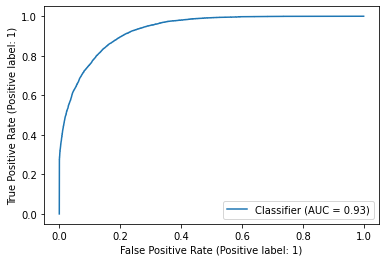

In [57]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_train, class_1_probabilities(best_ada, x_train))

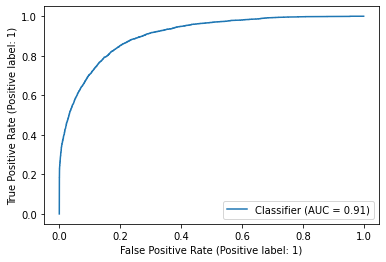

In [58]:
RocCurveDisplay.from_predictions(y_test, class_1_probabilities(best_ada, x_test))

## 3. GBM

Обучим модель GBM.

In [61]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier().fit(x_train, y_train)
prediction_train = gbm.predict(x_train)
prediction_test = gbm.predict(x_test)

Вычислим значения метрик для обученной модели.

Значения большинства метрик получились немного лучше, чем в случае AdaBoost.Далее попробуем улучшить значения метрик с помощью подбора гиперпараметров.

In [62]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print('Accuracy on train: ', accuracy_score(y_train, prediction_train))
print('Accuracy on test: ', accuracy_score(y_test, prediction_test))
print()
print('Precision on train: ', precision_score(y_train, prediction_train))
print('Precision on test: ', precision_score(y_test, prediction_test))
print()
print('Recall on train: ', recall_score(y_train, prediction_train))
print('Recall on test: ', recall_score(y_test, prediction_test))
print()
print('F1 on train: ', f1_score(y_train, prediction_train))
print('F1 on test: ', f1_score(y_test, prediction_test))
print()
print('AUC ROC on train: ', roc_auc_score(y_train, class_1_probabilities(gbm, x_train)))
print('AUC ROC on test: ', roc_auc_score(y_test, class_1_probabilities(gbm, x_test)))

Accuracy on train:  0.8690150793894537
Accuracy on test:  0.8672685952951293

Precision on train:  0.796812749003984
Precision on test:  0.7868573374191352

Recall on train:  0.6121668154572121
Recall on test:  0.6008840353614144

F1 on train:  0.6923909123692752
F1 on test:  0.6814094058676102

AUC ROC on train:  0.9256292101430166
AUC ROC on test:  0.9182696145803211


Для подбора гиперпараметров будем использовать GridSearchCV.

При первом запуске зададим большие интервалы поиска для гиперпараметров, чтобы определить примерные значения гиперпараметром.

In [63]:
start_time = datetime.now()

param_grid = {'learning_rate': np.linspace(0.5, 1.5, 6), 'min_samples_leaf': np.linspace(1, 100, 5, dtype=int), 'max_depth': np.linspace(2, 10, 5, dtype=int)}

cv = GridSearchCV(estimator=GradientBoostingClassifier(n_estimators=100), param_grid=param_grid, cv=3, scoring='roc_auc', n_jobs=-1)
cv.fit(x_train, y_train)

print('Execution time:')
print(datetime.now() - start_time)

Execution time:
0:35:43.195406


In [68]:
cv.best_estimator_

GradientBoostingClassifier(learning_rate=0.5, max_depth=2)

In [67]:
cv.best_params_

{'learning_rate': 0.5, 'max_depth': 2, 'min_samples_leaf': 1}

In [66]:
cv.best_score_

0.9260118481965924

Сузим интервалы к окрестностям значений из предыдущего этапа, и снова запустим GridSearchCV, чтобы подобрать более точные оптимальные значения.

In [74]:
start_time = datetime.now()

param_grid = {'learning_rate': [0.3, 0.4, 0.5, 0.6], 'min_samples_leaf': [1, 2, 3, 4], 'max_depth': [2, 3, 4]}

cv = GridSearchCV(estimator=GradientBoostingClassifier(n_estimators=100), param_grid=param_grid, cv=3, scoring='roc_auc', n_jobs=-1)
cv.fit(x_train, y_train)

print('Execution time:')
print(datetime.now() - start_time)

Execution time:
0:06:02.277324


In [75]:
best_gbm = cv.best_estimator_
best_gbm

GradientBoostingClassifier(learning_rate=0.3, min_samples_leaf=3)

In [71]:
cv.best_params_

{'learning_rate': 0.4, 'max_depth': 3, 'min_samples_leaf': 3}

In [72]:
cv.best_score_

0.926908627146782

Вычислим прогнозы модели с оптимальными гиперпараметрами.

In [76]:
prediction_train = best_gbm.predict(x_train)
prediction_test = best_gbm.predict(x_test)

Вычислим значения метрик для модели с оптимальными гиперпараметрами. Значения части метрик немного улучшились, но в целом значения изменились мало.

In [77]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print('Accuracy on train: ', accuracy_score(y_train, prediction_train))
print('Accuracy on test: ', accuracy_score(y_test, prediction_test))
print()
print('Precision on train: ', precision_score(y_train, prediction_train))
print('Precision on test: ', precision_score(y_test, prediction_test))
print()
print('Recall on train: ', recall_score(y_train, prediction_train))
print('Recall on test: ', recall_score(y_test, prediction_test))
print()
print('F1 on train: ', f1_score(y_train, prediction_train))
print('F1 on test: ', f1_score(y_test, prediction_test))
print()
print('AUC ROC on train: ', roc_auc_score(y_train, class_1_probabilities(best_gbm, x_train)))
print('AUC ROC on test: ', roc_auc_score(y_test, class_1_probabilities(best_gbm, x_test)))

Accuracy on train:  0.8820367924818033
Accuracy on test:  0.8679442294699343

Precision on train:  0.8081664098613252
Precision on test:  0.7648344784509682

Recall on train:  0.6689197806402245
Recall on test:  0.6367654706188247

F1 on train:  0.7319796245900496
F1 on test:  0.6949489216799092

AUC ROC on train:  0.9372628018683634
AUC ROC on test:  0.9188965564251843


Построим ROC-кривые для обучающей и тестовой выборок.

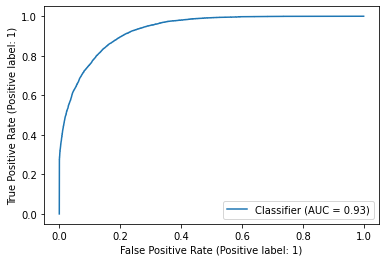

In [ ]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_train, class_1_probabilities(best_ada, x_train))

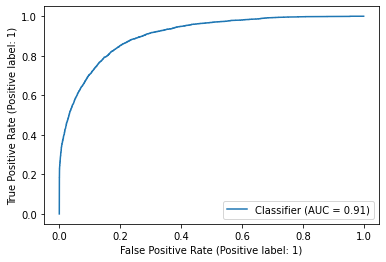

In [ ]:
RocCurveDisplay.from_predictions(y_test, class_1_probabilities(best_ada, x_test))